Exponentially Weighted Average (EWA) or Exponentially Moving Average is a type of moving average that assigns weight to observed data. As the data is more from the past, its weight for the calculation will decrease exponentially.  It is behind the scenes of many optimization algorithms in deep learning, including Gradient Descent with Momentum, RMSprop, Adam, etc.

$\text{Exponentially weighted average:}$<p>
$\quad\quad\quad V_t=\beta .V_{t-1}+(1-\beta).{\theta}_t$<p>
$\text{Define:}$<p>
$\quad\quad\quad V_t=\text{EWA for day t (Set }V_0=0)$ <p>
$\quad\quad\quad {\theta}_t= \text{Temperature for day t}$<p>  
$\quad\quad\quad\beta =\text{Weight parameter [0,1]}$<p>
<p>
$V_t=
\begin{cases}
0 & \quad t=0\\
\beta .V_{t-1}+(1-\beta).{\theta}_t & \quad t>0
\end{cases}
$<p>
Let's build an intuition of what this equation is all about.<p>
$V_0=0$<p>$V_1=\beta V_0+(1-\beta)\theta_1\quad=(1-\beta)\theta_1$<p> 
$V_2=\beta V_1+(1-\beta)\theta_2\quad=\beta(1-\beta)\theta_1+(1+\beta)\theta_2\quad=(1+\beta)(\beta\theta_1+\theta_2)$<p> 
$V_3=\beta V_2+(1-\beta)\theta_3\quad=\beta((1-\beta)(\beta\theta_1+\theta_2))+(1-\beta)\theta_3\quad=(1-\beta)(\beta^2\theta_1+\beta\theta_2+\theta_3)$<p>
$V_4=\beta V_3+(1-\beta)\theta_4\quad=\beta((1-\beta)(\beta^2\theta_1+\beta\theta_2+\theta_3))+(1+\beta)\theta_4\quad=(1-\beta)(\beta^3\theta_1+\beta^2\theta_2+\beta\theta_3+\theta_4)$<p>
$\vdots$<p>
$V_t=\beta V_{t-1}+(1-\beta)\theta_t\quad=(1-\beta)(\beta^{t-1}\theta_{1}+\beta^{t-2}\theta_2+\beta^{t-3}\theta_3+...+\beta^{t-t}\theta_t)$


We can see older observations are given lower weights. The weights fall exponentially as the data point gets older hence the name exponentially weighted.<p>                             
$V_t$ is approximately averaging over $\frac{1}{1-\beta}$ days temperature.<p>
If $\beta =0.9;\ \text{No. of days}=\frac{1}{1-0.9}=10$<p>
If $\beta =0.5;\ \text{No. of days}=\frac{1}{1-0.5}=2$<p>

In a vectorized form:<p>
$V_t=[1-\beta]*[\beta^{t-1}\ \beta^{t-2}\ \beta^{t-3}...\ \beta^{t-t}]\odot[\theta_1\ \theta_2\ \theta_3\ ...\ \theta_t]$

We can rewrite the equation in a reversed order:<p>
$V_t=(1-\beta)(\theta_t+\beta\theta_{t-1}+\beta^2\theta_{t-2}+...+\beta^{t-3}\theta_3+\beta^{t-2}\theta_2+\beta^{t-1}\theta_1)$<p>
The closed formula:<p>
$V_t=(1-\beta)\displaystyle\sum_{k=1}^t{\beta^{t-k}\theta_k}$

In [2]:
import pandas as pd
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dfw=pd.read_csv("Pictures/city_temperature.csv", low_memory=False)
dfw.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [4]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [5]:
dfw.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [6]:
Alg=dfw.loc[dfw["Country"]=="Algeria"].loc[dfw["City"]=="Algiers"]
Alg["Day"]=[i+1 for i in range(len(Alg.index))]
Alg=Alg[["Day", "AvgTemperature"]]
Alg.head()

,Day,AvgTemperature
0,1,64.2
1,2,49.4
2,3,48.8
3,4,46.4
4,5,47.9


In [7]:
df=Alg.set_index("Day")
df.head()

,AvgTemperature
Day,
1,64.2
2,49.4
3,48.8
4,46.4
5,47.9


In [8]:
#Use first 200 examples of the dataset
df=df.iloc[0:200]


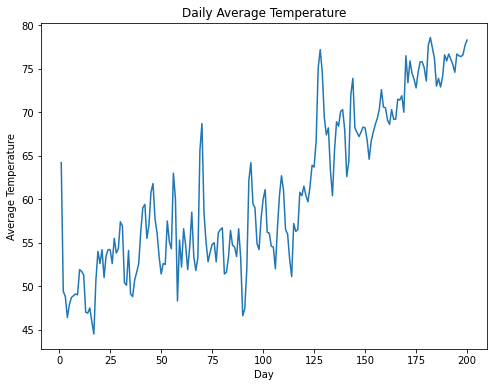

In [9]:
plt.figure(figsize=(8,6))
plt.xlabel("Day")
plt.ylabel("Average Temperature")
plt.title("Daily Average Temperature")
plt.plot(df.index, df.AvgTemperature)


In [10]:
theta=df.AvgTemperature.to_numpy()
EWA_1=[]
EWA_2=[]
EWA_3=[]
V_t1=0
V_t2=0
V_t3=0
beta_1=0.96
beta_2=0.9
beta_3=0.6
t=1
for i in range(len(theta)):
    V_t1=beta_1*V_t1+(1-beta_1)*theta[i]
    EWA_1.append(V_t1)
    V_t2=beta_2*V_t2+(1-beta_2)*theta[i]
    EWA_2.append(V_t2)
    V_t3=beta_3*V_t3+(1-beta_3)*theta[i]
    EWA_3.append(V_t3)
    t+=1


In [11]:
#Add columns of EWAs with 0.96, 0.9 and 0.6 weight parameters to the dataframe
df["EWA(0.96)"]=EWA_1
df["EWA(0.9)"]=EWA_2
df["EWA(0.6)"]=EWA_3
df.head(10)

,AvgTemperature,EWA(0.96),EWA(0.9),EWA(0.6)
Day,,,,
1,64.2,2.568000,6.420000,25.680000
2,49.4,4.441280,10.718000,35.168000
3,48.8,6.215629,14.526200,40.620800
4,46.4,7.823004,17.713580,42.932480
5,47.9,9.426084,20.732222,44.919488
6,48.7,10.997040,23.529000,46.431693
7,48.9,12.513159,26.066100,47.419016
8,49.1,13.976632,28.369490,48.091409
9,49.0,15.377567,30.432541,48.454846


In [12]:
eq1=latex(Eq(symbols("beta"),beta_1))
eq2=latex(Eq(symbols("beta"),beta_2))
eq3=latex(Eq(symbols("beta"),beta_3))

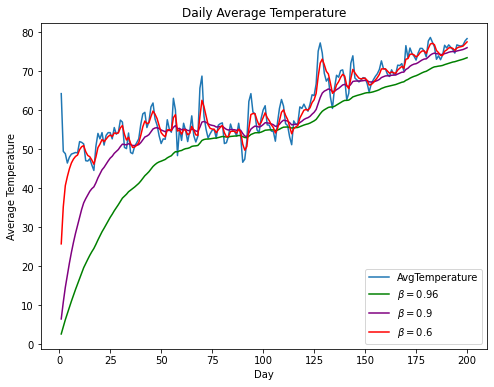

In [13]:
plt.figure(figsize=(8,6))
plt.xlabel("Day")
plt.ylabel("Average Temperature")
plt.title("Daily Average Temperature")
plt.plot(df.index, df.AvgTemperature, label="AvgTemperature")
plt.plot(df.index, EWA_1, color="green", label=f"${eq1}$")
plt.plot(df.index, EWA_2, color="purple", label=f"${eq2}$")
plt.plot(df.index, EWA_3, color="red", label=f"${eq3}$")
plt.legend()
plt.show()


The higher the value of the weight parameter $\beta$, the smoother the EWA line.

### EWA Bias Correction

$$V_t\leftarrow\frac{V_t}{1-\beta^t}$$

We initialized $V_0=0$<p>
So $V_2=\beta V_0+(1-\beta)\theta_2=(1-\beta)\theta_2$<p>
$V_2$ will be very low which is not a good estimate of the first data point.<p>
We use bias correction to fix this.<p>
$$V_2=\frac{\beta V_0+(1-\beta)\theta_2}{1-\beta^2}$$<p>
When $t$ becomes large $1-\beta^t$ approaches 1 thus, the bias correction disappears. We use bias correction to obtain the better estimate at the initial phase and it automatically correct itself as $t$ becomes large, that is, as we perform more iterations. It is not oftenly use but if concerned about bias during initial phase while EWA is still warming up, then bias correction could help get a better estimate early on.
    

In [14]:
theta=df.AvgTemperature.to_numpy()
V_t_corrected=0
beta_2=0.9
EWA_2_corrected=[]
t=1
for i in range(len(theta)):
    correct=1-(beta_2**t)
    V_t=beta_2*V_t_corrected+(1-beta_2)*theta[i]
    V_t_corrected=V_t/correct
    EWA_2_corrected.append(V_t_corrected)
    t+=1
df["EWA(0.9)_Corrected"]=EWA_2_corrected 


In [15]:
df

,AvgTemperature,EWA(0.96),EWA(0.9),EWA(0.6),EWA(0.9)_Corrected
Day,,,,,
1,64.2,2.568000,6.420000,25.680000,64.200000
2,49.4,4.441280,10.718000,35.168000,330.105263
3,48.8,6.215629,14.526200,40.620800,1114.297922
4,46.4,7.823004,17.713580,42.932480,2929.654346
5,47.9,9.426084,20.732222,44.919488,6450.340436
...,...,...,...,...,...
196,76.5,72.720534,75.267089,76.121937,75.273738
197,76.4,72.867712,75.380380,76.233162,75.386364
198,76.6,73.017004,75.502342,76.379897,75.507728


From the data frame we can see that EWA(0.9)Corrected gets align with EWA(0.9) as $t$ gets large.